In [774]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [775]:
df = pd.read_excel("loan.xlsx")

In [776]:
df.shape

(11780, 15)

In [777]:
# used to get mean,max, min and percentile of numerical columns
df.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,11780.000000,11780.000000,5976.000000,11776.000000,11780.000000,11751.000000,11587.000000,11751.000000,11780.000000,11751.000000
mean,11357.349321,12.979654,5.266232,58827.594644,15.316434,0.163646,52.707962,22.837120,0.216469,16.650668
std,7770.383196,4.389470,3.522395,40534.430473,7.521249,0.563901,26.439455,11.301697,0.411855,9.144276
min,700.000000,5.420000,0.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,5500.000000,9.670000,2.000000,35000.000000,9.607500,0.000000,32.200000,14.000000,0.000000,10.000000
50%,10000.000000,12.690000,5.000000,50000.000000,15.210000,0.000000,54.800000,21.000000,0.000000,14.000000
75%,15000.000000,15.990000,9.000000,72000.000000,20.775000,0.000000,74.000000,29.000000,0.000000,21.000000
max,35000.000000,26.060000,10.000000,760000.000000,39.500000,10.000000,105.300000,79.000000,1.000000,61.000000


In [778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11780 entries, 0 to 11779
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              11780 non-null  int64  
 1   term                   11780 non-null  object 
 2   int_rate               11780 non-null  float64
 3   emp_length             5976 non-null   float64
 4   home_ownership         11780 non-null  object 
 5   annual_inc             11776 non-null  float64
 6   purpose                11780 non-null  object 
 7   addr_state             11780 non-null  object 
 8   dti                    11780 non-null  float64
 9   delinq_2yrs            11751 non-null  float64
 10  revol_util             11587 non-null  float64
 11  total_acc              11751 non-null  float64
 12  bad_loan               11780 non-null  int64  
 13  longest_credit_length  11751 non-null  float64
 14  verification_status    11780 non-null  object 
dtypes:

In [779]:
# categorical columns

# Numerical columns

In [780]:
# checking for duplicate rows
df.duplicated().sum()

0

In [781]:
# Calculating percentage of null values
TotalNullValues = sum(df.isnull().sum())
TotalElements = df.shape[0] * df.shape[1]
NullPct = (TotalNullValues/TotalElements) * 100
NullPct

3.44538766270515

In [782]:
# columns with null values
colNull = df.columns[df.isnull().any()]
colNull

Index(['emp_length', 'annual_inc', 'delinq_2yrs', 'revol_util', 'total_acc',
       'longest_credit_length'],
      dtype='object')

In [783]:
# emp_length
df['emp_length'].dtype

dtype('float64')

<AxesSubplot:xlabel='emp_length'>

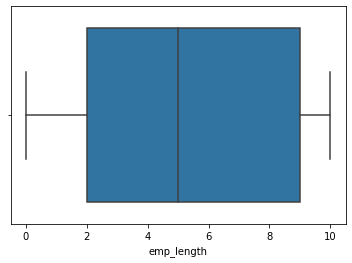

In [784]:
sns.boxplot(x = 'emp_length', data = df) 

In [785]:
# impute with median
med = df['emp_length'].median()
df['emp_length'] = df['emp_length'].fillna(med)

In [786]:
# total_acc
df['total_acc'].isnull().sum()

29

In [787]:
mn = df['total_acc'].mean()
df['total_acc'] = df['total_acc'].fillna(mn)

In [788]:
# delinq_2yrs
df['delinq_2yrs'].isnull().sum()

29

In [789]:
#sns.boxplot(x = 'delinq_2yrs', data = df) 
#plt.show()

In [790]:
mn = df['delinq_2yrs'].mean()
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(mn)

In [791]:
#revol_util
df['revol_util'].isnull().sum()

193

In [792]:
df['revol_util'].dtype

dtype('float64')

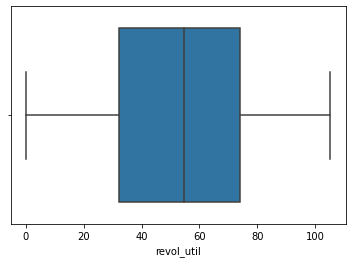

In [793]:
sns.boxplot(x = 'revol_util', data = df) 
plt.show()

In [794]:
mn = df['revol_util'].mean()
df['revol_util'] = df['revol_util'].fillna(mn)

In [795]:
# longest_credit_length
df['longest_credit_length'].isnull().sum()

29

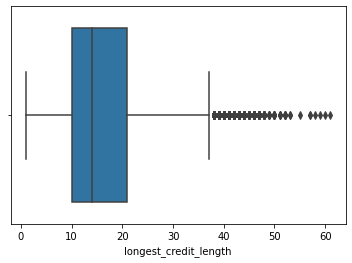

In [796]:
sns.boxplot(x = 'longest_credit_length', data = df) 
plt.show()

In [797]:
md = df['longest_credit_length'].median()
df['longest_credit_length'] = df['longest_credit_length'].fillna(md)

In [798]:
sum(df.isnull().sum())

4

In [799]:
# dropping rows with annual_inc = NULL
df.dropna(inplace = True)

In [800]:
# checking if all NAs removed
sum(df.isnull().sum())

0

In [801]:
df

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,8875,36 months,15.80,5.0,RENT,25468.92,debt_consolidation,CT,28.51,0.0,39.6,24.0,0,37.0,verified
1,4800,36 months,12.69,6.0,RENT,33000.00,other,IL,4.22,0.0,96.8,18.0,0,16.0,not verified
2,12000,60 months,11.67,5.0,MORTGAGE,64400.00,credit_card,MA,12.49,0.0,65.8,22.0,0,31.0,verified
3,8000,36 months,14.27,5.0,MORTGAGE,66000.00,home_improvement,CA,2.11,0.0,0.0,18.0,1,30.0,not verified
4,15000,36 months,10.99,5.0,OWN,39828.00,debt_consolidation,MT,15.97,0.0,62.6,7.0,0,13.0,not verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11775,5000,36 months,15.27,1.0,MORTGAGE,60000.00,home_improvement,PA,11.72,1.0,82.8,25.0,0,21.0,not verified
11776,30000,60 months,11.71,0.0,MORTGAGE,92088.00,debt_consolidation,FL,15.31,0.0,52.3,30.0,0,24.0,verified
11777,8000,36 months,14.65,10.0,RENT,50000.00,debt_consolidation,VA,0.77,0.0,26.9,7.0,0,17.0,verified
11778,11100,36 months,15.27,6.0,RENT,45000.00,debt_consolidation,NY,4.64,0.0,95.8,9.0,1,15.0,verified


Text(0.5, 1.0, 'Loan amount v/s Frequency')

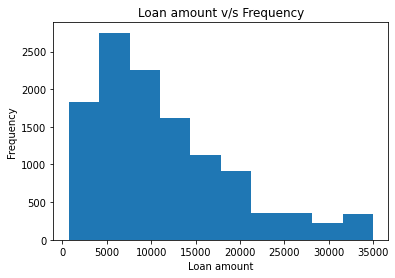

In [802]:
plt.hist(df.loan_amnt)
plt.xlabel("Loan amount")
plt.ylabel("Frequency")
plt.title("Loan amount v/s Frequency")

In [803]:
#from the above histogram, it can be observed that most of the people have taken loan between 1000 and 15000
#the number of people who have taken loan amount more than 15000( frequency ) is lesser

{'whiskers': [<matplotlib.lines.Line2D at 0x2185b6b8>,
 'caps': [<matplotlib.lines.Line2D at 0x2185be98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f1eb7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x21cfa070>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cfa2e0>],
 'means': []}

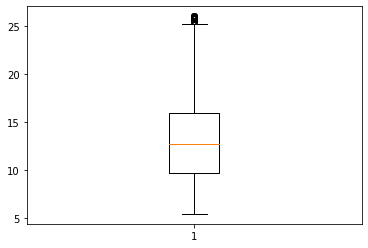

In [804]:
plt.boxplot(df.int_rate)

In [805]:
#boxplot using matplotlib library
# the minimum (Q1 - 1.5*IQR ) lies at around 5.5
# the maximum (Q3 + 1.5*IQR ) lies at around 25.5
# Q1 (25th percentile) is at around 8.5
# Q3 (75th percentile) is at around 16.0
# Median (50th percentile) is at around 12

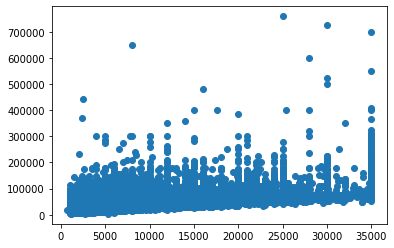

In [806]:
plt.scatter(df.loan_amnt, df.annual_inc)

In [807]:
#scatterplot of loan amount and annual income
#it shows how X and Y vary relatively

<function matplotlib.pyplot.show(close=None, block=None)>

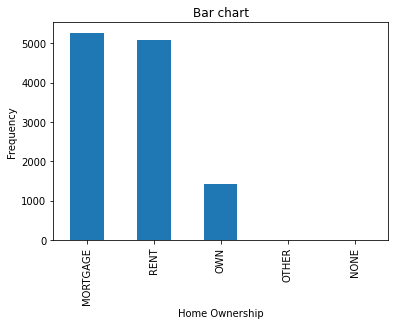

In [808]:
df.home_ownership.value_counts().plot(kind = "bar")
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.title('Bar chart')
plt.show

In [809]:
# The above bar chart shows, nearly 6000 people have mortgaged their house for loan
# Around 5000 people have rented home
# 1500 people own a home

In [810]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'bad_loan', 'longest_credit_length',
       'verification_status'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x220e08f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1efd3d78>,
 'boxes': [<matplotlib.lines.Line2D at 0x220e05c8>],
 'medians': [<matplotlib.lines.Line2D at 0x23363ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23363d90>],
 'means': []}

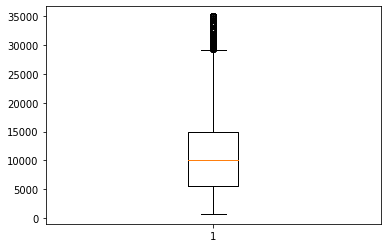

In [811]:
#check if it has outliers
plt.boxplot(df.loan_amnt)

In [812]:
Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
filter = (df['loan_amnt'] >= Q1 - 1.5 * IQR) & (df['loan_amnt'] <= Q3 + 1.5 *IQR)
df.loc[filter]

9500.0


,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,8875,36 months,15.80,5.0,RENT,25468.92,debt_consolidation,CT,28.51,0.0,39.6,24.0,0,37.0,verified
1,4800,36 months,12.69,6.0,RENT,33000.00,other,IL,4.22,0.0,96.8,18.0,0,16.0,not verified
2,12000,60 months,11.67,5.0,MORTGAGE,64400.00,credit_card,MA,12.49,0.0,65.8,22.0,0,31.0,verified
3,8000,36 months,14.27,5.0,MORTGAGE,66000.00,home_improvement,CA,2.11,0.0,0.0,18.0,1,30.0,not verified
4,15000,36 months,10.99,5.0,OWN,39828.00,debt_consolidation,MT,15.97,0.0,62.6,7.0,0,13.0,not verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11774,10000,36 months,14.65,4.0,OWN,42000.00,house,FL,21.54,3.0,29.5,27.0,0,11.0,not verified
11775,5000,36 months,15.27,1.0,MORTGAGE,60000.00,home_improvement,PA,11.72,1.0,82.8,25.0,0,21.0,not verified
11777,8000,36 months,14.65,10.0,RENT,50000.00,debt_consolidation,VA,0.77,0.0,26.9,7.0,0,17.0,verified
11778,11100,36 months,15.27,6.0,RENT,45000.00,debt_consolidation,NY,4.64,0.0,95.8,9.0,1,15.0,verified


In [813]:
#outliers from  loan_amnt deleted
df = df.loc[filter]

In [814]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'bad_loan', 'longest_credit_length',
       'verification_status'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

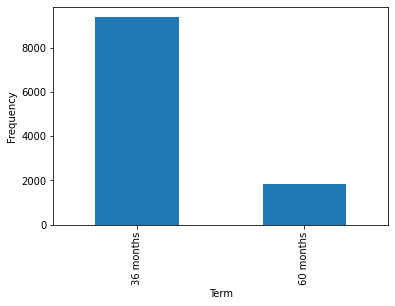

In [815]:
#check if this column has outliers. Since it is a categorical data, bar chart is used
df.term.value_counts().plot(kind = "bar")
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.show

In [816]:
# No outliers seen

{'whiskers': [<matplotlib.lines.Line2D at 0x12c116a0>,
 'caps': [<matplotlib.lines.Line2D at 0x12c11a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x12c114f0>],
 'medians': [<matplotlib.lines.Line2D at 0x12c11d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x12c11f10>],
 'means': []}

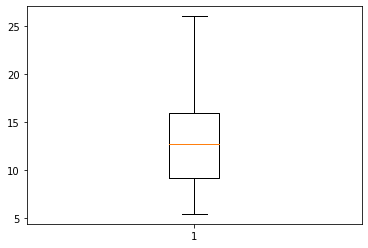

In [817]:
#check for outliers in int_rate column
plt.boxplot(df.int_rate)

In [818]:
#remove outliers
Q1 = df['int_rate'].quantile(0.25)
Q3 = df['int_rate'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3)
print(IQR)
filter = (df['int_rate'] >= Q1 - 1.5 * IQR) & (df['int_rate'] <= Q3 + 1.5 *IQR)
df.loc[filter]

9.17 15.96
6.790000000000001


,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,8875,36 months,15.80,5.0,RENT,25468.92,debt_consolidation,CT,28.51,0.0,39.6,24.0,0,37.0,verified
1,4800,36 months,12.69,6.0,RENT,33000.00,other,IL,4.22,0.0,96.8,18.0,0,16.0,not verified
2,12000,60 months,11.67,5.0,MORTGAGE,64400.00,credit_card,MA,12.49,0.0,65.8,22.0,0,31.0,verified
3,8000,36 months,14.27,5.0,MORTGAGE,66000.00,home_improvement,CA,2.11,0.0,0.0,18.0,1,30.0,not verified
4,15000,36 months,10.99,5.0,OWN,39828.00,debt_consolidation,MT,15.97,0.0,62.6,7.0,0,13.0,not verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11774,10000,36 months,14.65,4.0,OWN,42000.00,house,FL,21.54,3.0,29.5,27.0,0,11.0,not verified
11775,5000,36 months,15.27,1.0,MORTGAGE,60000.00,home_improvement,PA,11.72,1.0,82.8,25.0,0,21.0,not verified
11777,8000,36 months,14.65,10.0,RENT,50000.00,debt_consolidation,VA,0.77,0.0,26.9,7.0,0,17.0,verified
11778,11100,36 months,15.27,6.0,RENT,45000.00,debt_consolidation,NY,4.64,0.0,95.8,9.0,1,15.0,verified


In [819]:
# the outliers for int_rate column are removed
df = df.loc[filter]

{'whiskers': [<matplotlib.lines.Line2D at 0x23402820>,
 'caps': [<matplotlib.lines.Line2D at 0x23402b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x23402670>],
 'medians': [<matplotlib.lines.Line2D at 0x23402ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2340e0b8>],
 'means': []}

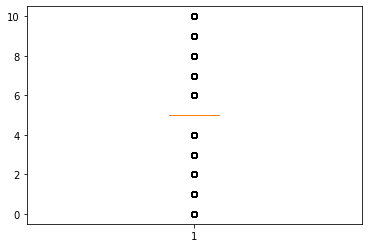

In [820]:
# Check for outliers in emp_length column
plt.boxplot(df.emp_length)

In [821]:
#no unwanted outliers seen

<function matplotlib.pyplot.show(close=None, block=None)>

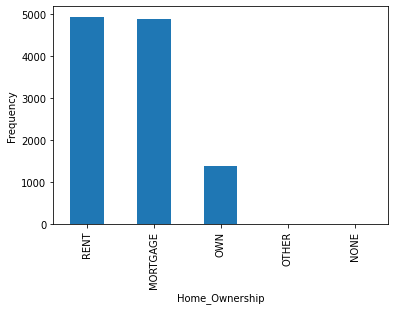

In [822]:
#check for outliers in home_ownership. It is a categorical data
df.home_ownership.value_counts().plot(kind = "bar")
plt.xlabel('Home_Ownership')
plt.ylabel('Frequency')
plt.show

In [823]:
# no outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x12d93280>,
 'caps': [<matplotlib.lines.Line2D at 0x12d935e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12d930d0>],
 'medians': [<matplotlib.lines.Line2D at 0x12d93940>],
 'fliers': [<matplotlib.lines.Line2D at 0x12d93af0>],
 'means': []}

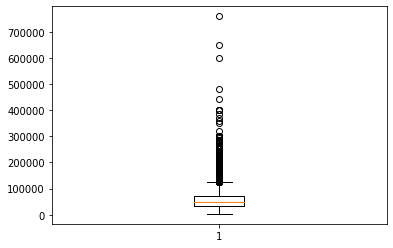

In [824]:
# Check for unwanted outliers in annual_inc column
plt.boxplot(df.annual_inc)

In [825]:
# There are quite a number of outliers, so they are not unwanted outliers

In [826]:
#Check the purpose column

<function matplotlib.pyplot.show(close=None, block=None)>

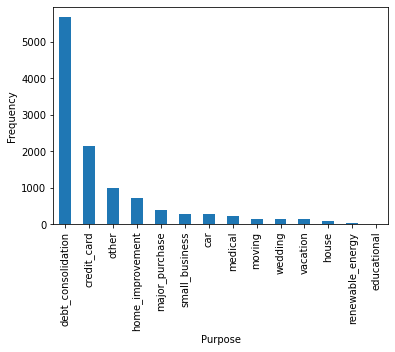

In [827]:
df.purpose.value_counts().plot(kind = "bar")
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.show

In [828]:
# The Categorical data has no outliers

<function matplotlib.pyplot.show(close=None, block=None)>

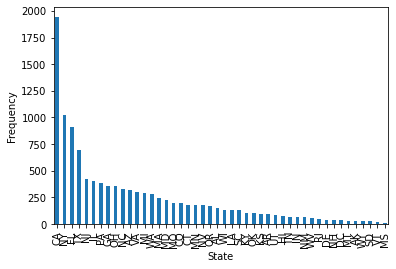

In [829]:
# Similarly check the addr_state column
df.addr_state.value_counts().plot(kind = "bar")
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show

In [830]:
# Check for dti column

{'whiskers': [<matplotlib.lines.Line2D at 0x12c95118>,
 'caps': [<matplotlib.lines.Line2D at 0x12c95478>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c78f40>],
 'medians': [<matplotlib.lines.Line2D at 0x12c957d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x12c95988>],
 'means': []}

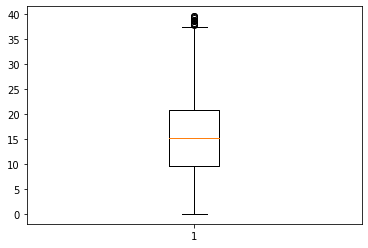

In [831]:
plt.boxplot(df.dti)

In [832]:
#remove outliers
Q1 = df['dti'].quantile(0.25)
Q3 = df['dti'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3)
print(IQR)
filter = (df['dti'] >= Q1 - 1.5 * IQR) & (df['dti'] <= Q3 + 1.5 *IQR)
df.loc[filter]

9.65 20.81
11.159999999999998


,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,8875,36 months,15.80,5.0,RENT,25468.92,debt_consolidation,CT,28.51,0.0,39.6,24.0,0,37.0,verified
1,4800,36 months,12.69,6.0,RENT,33000.00,other,IL,4.22,0.0,96.8,18.0,0,16.0,not verified
2,12000,60 months,11.67,5.0,MORTGAGE,64400.00,credit_card,MA,12.49,0.0,65.8,22.0,0,31.0,verified
3,8000,36 months,14.27,5.0,MORTGAGE,66000.00,home_improvement,CA,2.11,0.0,0.0,18.0,1,30.0,not verified
4,15000,36 months,10.99,5.0,OWN,39828.00,debt_consolidation,MT,15.97,0.0,62.6,7.0,0,13.0,not verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11774,10000,36 months,14.65,4.0,OWN,42000.00,house,FL,21.54,3.0,29.5,27.0,0,11.0,not verified
11775,5000,36 months,15.27,1.0,MORTGAGE,60000.00,home_improvement,PA,11.72,1.0,82.8,25.0,0,21.0,not verified
11777,8000,36 months,14.65,10.0,RENT,50000.00,debt_consolidation,VA,0.77,0.0,26.9,7.0,0,17.0,verified
11778,11100,36 months,15.27,6.0,RENT,45000.00,debt_consolidation,NY,4.64,0.0,95.8,9.0,1,15.0,verified


In [833]:
# Outliers removed
df = df.loc[filter]

{'whiskers': [<matplotlib.lines.Line2D at 0x12c84ce8>,
 'caps': [<matplotlib.lines.Line2D at 0x22071070>,
 'boxes': [<matplotlib.lines.Line2D at 0x12c84b38>],
 'medians': [<matplotlib.lines.Line2D at 0x220713d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22071580>],
 'means': []}

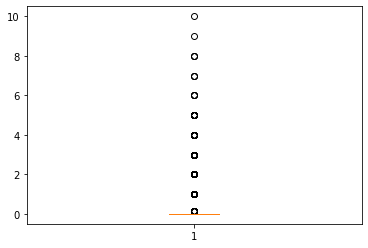

In [834]:
#Check for outliers in delinq_2yrs column
plt.boxplot(df.delinq_2yrs)

In [835]:
# No unwanted outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x220ae7a8>,
 'caps': [<matplotlib.lines.Line2D at 0x220aeb08>,
 'boxes': [<matplotlib.lines.Line2D at 0x220ae5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x220aee68>],
 'fliers': [<matplotlib.lines.Line2D at 0x220a8040>],
 'means': []}

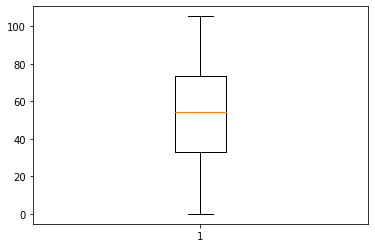

In [836]:
#Check for unwanted outliers in revol_util column
plt.boxplot(df.revol_util)

In [837]:
# No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1f440f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4422b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f440d78>],
 'medians': [<matplotlib.lines.Line2D at 0x1f442610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4427c0>],
 'means': []}

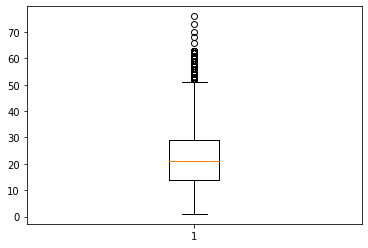

In [838]:
#Check for outliers in total_acc column
plt.boxplot(df.total_acc)

In [839]:
# Since there are quite a lot of outliers, removing them will majorly affect our sample dataset
# They are not unwanted outliers

In [840]:
#Check for unwanted outliers in bad_loan column

{'whiskers': [<matplotlib.lines.Line2D at 0x1f456988>,
 'caps': [<matplotlib.lines.Line2D at 0x1f457100>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c912f8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f457730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4578e0>],
 'means': []}

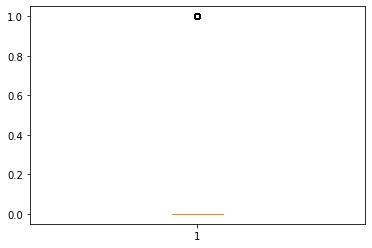

In [841]:
plt.boxplot(df.bad_loan)

In [842]:
#No unwanted outliers in this column

{'whiskers': [<matplotlib.lines.Line2D at 0x1f457f40>,
 'caps': [<matplotlib.lines.Line2D at 0x204bad48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f457058>],
 'medians': [<matplotlib.lines.Line2D at 0x21c38160>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c38310>],
 'means': []}

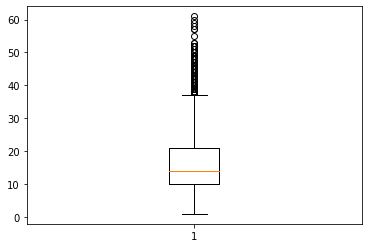

In [843]:
#Check for unwanted outliers in longest credit length column
plt.boxplot(df.longest_credit_length)

In [844]:
#There are many outliers,that are wanted
#No removal of outliers here

<function matplotlib.pyplot.show(close=None, block=None)>

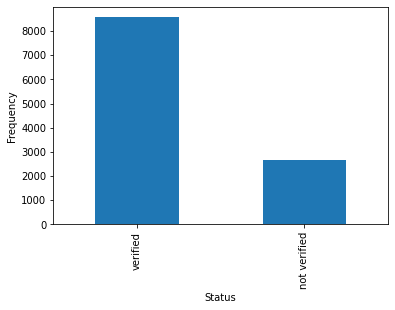

In [845]:
#Check for outliers in verification_status column
df.verification_status.value_counts().plot(kind = "bar")
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show

In [846]:
# All the unwanted outliers are removed here

# Computing the mean and variance of every numerical column

In [847]:
# Mean and variance of loan_amnt column
print(df['loan_amnt'].mean())
print(df['loan_amnt'].var())

10321.946547884187
39568953.22237426


In [848]:
# Mean and variance of int_rate column
print(df['int_rate'].mean())
print(df['int_rate'].var())

12.83978619153675
18.704904640668182


In [849]:
# Mean and variance of emp_length column
print(df['emp_length'].mean())
print(df['emp_length'].var())

5.111358574610245
6.178439217902459


In [850]:
# Mean and variance of annual income column
print(df['annual_inc'].mean())
print(df['annual_inc'].var())

55959.41720178173
1293771231.3516634


In [851]:
# Mean and variance of dti column
print(df['dti'].mean())
print(df['dti'].var())

15.330717149220492
56.20330900988496


In [852]:
# Mean and variance of delinq_2yrs column
print(df['delinq_2yrs'].mean())
print(df['delinq_2yrs'].var())

0.16170076981554335
0.3164796741475339


In [853]:
# Mean and variance of revol_util column
print(df['revol_util'].mean())
print(df['revol_util'].var())

52.72864153133754
687.1660878821185


In [854]:
# Mean and variance of total_acc column
print(df['total_acc'].mean())
print(df['total_acc'].var())

22.482844365801974
124.37825530620167


In [855]:
# Mean and variance of bad_loan column
print(df['bad_loan'].mean())
print(df['bad_loan'].var())

0.213630289532294
0.1680073561744083


In [856]:
# Mean and variance of longest credit length column
print(df['longest_credit_length'].mean())
print(df['longest_credit_length'].var())

16.480267260579065
82.74535630775289


In [857]:
# Standardization and Normalization of all numeric columns

In [858]:
# Normalizing the loan_amont column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:,0:1].values
df['loan_amnt'] = scaler.fit_transform(X)
print(df['loan_amnt'])

0       -0.230035
1       -0.877878
2        0.266777
3       -0.369143
4        0.743716
           ...   
11774   -0.051183
11775   -0.846082
11777   -0.369143
11778    0.123695
11779    2.289795
Name: loan_amnt, Length: 11225, dtype: float64


In [859]:
print(df['loan_amnt'].mean())
print(df['loan_amnt'].var())
# Mean is nearly zero and variance is almost 1

7.216202394356474e-17
1.0000890947968641


In [860]:
# Normalizing the interest rate column
X = df.iloc[:,2:3].values
df['int_rate'] = scaler.fit_transform(X)
print(df['int_rate'])

0        0.684486
1       -0.034635
2       -0.270488
3        0.330706
4       -0.427724
           ...   
11774    0.418573
11775    0.561935
11777    0.418573
11778    0.561935
11779    0.640553
Name: int_rate, Length: 11225, dtype: float64


In [861]:
print(df['int_rate'].mean())
print(df['int_rate'].var())
# Mean is nearly zero and variance is almost 1

-1.8863406258931836e-16
1.0000890947968637


In [862]:
# Normalize the emp_length column
X = df.iloc[:,3:4].values
df['emp_length'] = scaler.fit_transform(X)
print(df['emp_length'])

0       -0.044803
1        0.357525
2       -0.044803
3       -0.044803
4       -0.044803
           ...   
11774   -0.447130
11775   -1.654114
11777    1.966836
11778    0.357525
11779   -0.044803
Name: emp_length, Length: 11225, dtype: float64


In [863]:
print(df['emp_length'].mean())
print(df['emp_length'].var())
# Mean is nearly zero and variance is almost 1

4.3044014282126337e-17
1.000089094796864


In [864]:
# Normalizing annual income
X = df.iloc[:,5:6].values
df['annual_inc'] = scaler.fit_transform(X)
print(df['annual_inc'])

0       -0.847725
1       -0.638339
2        0.234673
3        0.279158
4       -0.448501
           ...   
11774   -0.388113
11775    0.112340
11777   -0.165689
11778   -0.304704
11779   -0.061150
Name: annual_inc, Length: 11225, dtype: float64


In [865]:
print(df['annual_inc'].mean())
print(df['annual_inc'].var())
# Mean is nearly zero and variance is almost 1

1.2470104137616013e-16
1.000089094796864


In [866]:
# Normalize dti column
X = df.iloc[:,8:9].values
df['dti'] = scaler.fit_transform(X)
print(df['dti'])

0        1.758046
1       -1.482110
2       -0.378936
3       -1.763573
4        0.085277
           ...   
11774    0.828285
11775   -0.481650
11777   -1.942322
11778   -1.426084
11779    1.656666
Name: dti, Length: 11225, dtype: float64


In [867]:
print(df['dti'].mean())
print(df['dti'].var())
# Mean is nearly zero and variance is almost 1

-2.329440772915072e-16
1.000089094796864


In [868]:
# Normalize delinq_2yrs column
X = df.iloc[:,9:10].values
df['delinq_2yrs'] = scaler.fit_transform(X)
print(df['delinq_2yrs'])

0       -0.287447
1       -0.287447
2       -0.287447
3       -0.287447
4       -0.287447
           ...   
11774    5.045505
11775    1.490203
11777   -0.287447
11778   -0.287447
11779    5.045505
Name: delinq_2yrs, Length: 11225, dtype: float64


In [869]:
print(df['delinq_2yrs'].mean())
print(df['delinq_2yrs'].var())
# Mean is nearly zero and variance is almost 1

8.862002940437775e-18
1.000089094796864


In [870]:
# Normalize revol_util column
X = df.iloc[:,10:11].values
df['revol_util'] = scaler.fit_transform(X)
print(df['revol_util'])

0       -0.500851
1        1.681299
2        0.498665
3       -2.011570
4        0.376587
           ...   
11774   -0.886160
11775    1.147206
11777   -0.985349
11778    1.643149
11779    0.136245
Name: revol_util, Length: 11225, dtype: float64


In [871]:
print(df['revol_util'].mean())
print(df['revol_util'].var())
# Mean is nearly zero and variance is almost 1

5.1906017222564113e-17
1.0000890947968637


In [872]:
# Normalize total account column
X = df.iloc[:,11:12].values
df['total_acc'] = scaler.fit_transform(X)
print(df['total_acc'])

0        0.136043
1       -0.401977
2       -0.043297
3       -0.401977
4       -1.388346
           ...   
11774    0.405053
11775    0.225713
11777   -1.388346
11778   -1.209007
11779    2.736473
Name: total_acc, Length: 11225, dtype: float64


In [873]:
print(df['total_acc'].mean())
print(df['total_acc'].var())
# Mean is nearly zero and variance is almost 1

-1.2849904263634775e-16
1.0000890947968637


In [874]:
# Normalize bad loan column
X = df.iloc[:,12:13].values
df['bad_loan'] = scaler.fit_transform(X)
print(df['bad_loan'])

0       -0.521216
1       -0.521216
2       -0.521216
3        1.918589
4       -0.521216
           ...   
11774   -0.521216
11775   -0.521216
11777   -0.521216
11778    1.918589
11779   -0.521216
Name: bad_loan, Length: 11225, dtype: float64


In [875]:
print(df['bad_loan'].mean())
print(df['bad_loan'].var())
# Mean is nearly zero and variance is almost 1

-1.772400588087555e-17
1.0000890947968641


In [876]:
# Normalize longest credit length column
X = df.iloc[:,13:14].values
df['longest_credit_length'] = scaler.fit_transform(X)
print(df['longest_credit_length'])

0        2.255897
1       -0.052800
2        1.596269
3        1.486331
4       -0.382613
           ...   
11774   -0.602489
11775    0.496890
11777    0.057138
11778   -0.162738
11779    1.266455
Name: longest_credit_length, Length: 11225, dtype: float64


In [877]:
print(df['longest_credit_length'].mean())
print(df['longest_credit_length'].var())
# Mean is nearly zero and variance is almost 1

-9.368403108462791e-17
1.0000890947968635


In [878]:
# Check the data frame 

df

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,-0.230035,36 months,0.684486,-0.044803,RENT,-0.847725,debt_consolidation,CT,1.758046,-0.287447,-0.500851,0.136043,-0.521216,2.255897,verified
1,-0.877878,36 months,-0.034635,0.357525,RENT,-0.638339,other,IL,-1.482110,-0.287447,1.681299,-0.401977,-0.521216,-0.052800,not verified
2,0.266777,60 months,-0.270488,-0.044803,MORTGAGE,0.234673,credit_card,MA,-0.378936,-0.287447,0.498665,-0.043297,-0.521216,1.596269,verified
3,-0.369143,36 months,0.330706,-0.044803,MORTGAGE,0.279158,home_improvement,CA,-1.763573,-0.287447,-2.011570,-0.401977,1.918589,1.486331,not verified
4,0.743716,36 months,-0.427724,-0.044803,OWN,-0.448501,debt_consolidation,MT,0.085277,-0.287447,0.376587,-1.388346,-0.521216,-0.382613,not verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11774,-0.051183,36 months,0.418573,-0.447130,OWN,-0.388113,house,FL,0.828285,5.045505,-0.886160,0.405053,-0.521216,-0.602489,not verified
11775,-0.846082,36 months,0.561935,-1.654114,MORTGAGE,0.112340,home_improvement,PA,-0.481650,1.490203,1.147206,0.225713,-0.521216,0.496890,not verified
11777,-0.369143,36 months,0.418573,1.966836,RENT,-0.165689,debt_consolidation,VA,-1.942322,-0.287447,-0.985349,-1.388346,-0.521216,0.057138,verified
11778,0.123695,36 months,0.561935,0.357525,RENT,-0.304704,debt_consolidation,NY,-1.426084,-0.287447,1.643149,-1.209007,1.918589,-0.162738,verified


In [879]:
# Unwanted outliers are removed 
# Numeric columns are normalized to make mean 0 and variance 1

In [880]:
#Discussion of the importance and effect of normalization

#->Normalization is removing unwanted or redundant data from the table in order to improve storage efficiency ,scalability and data integrity.
#->It is used in order to eliminate anomalies like insertion, deletion and update in the tables. 
#->It helps in dividing a large table into multiple small normalized tables that are connected and linked using a relationship to reduce redundancy

# Effect of normalization on dataset:
#->In normalization mean is set to 0 and variance is made 1. 
#->Elements can take negative values while originally they may not be negative
#->This is to make the mean zero and variance 1, so that the relation between values is also sustained


7.216202394356474e-17
1.0000890947968641


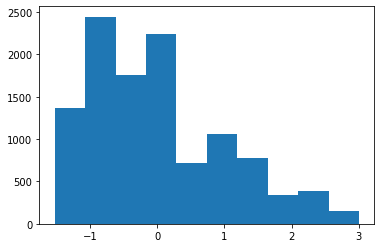

In [881]:
# Plot graph for any numeric column to check if the data is normal
plt.hist(df['loan_amnt'])
print(df['loan_amnt'].mean())
print(df['loan_amnt'].var())

In [882]:
# It can be seen that mean is 0 and variance is 1
# Graph shows that most of the values lie between -1.5 and 1, while only few values are more than 1.
# This is to maintain the mean 0 and variance 1, while the relation between values is also maintained
# Therefore the data is normalized

-1.8863406258931836e-16
1.0000890947968637


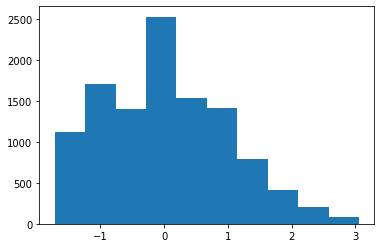

In [883]:
plt.hist(df['int_rate'])
print(df['int_rate'].mean())
print(df['int_rate'].var())

In [884]:
# The conclusion here is the same. Mean is nearly 0 and variance is nearly 1
# Most of the values lie closer and around 0 on either sides.Some values are more than 1
# Therefore the data is normalized

In [885]:
#Hypothesis testing
#Hypothesis testing is a formal procedure for investigating our ideas about the world using statistics. 
#It is most often used by scientists to test specific predictions,called hypotheses,that arise from theories.
#There are 5 main steps in hypothesis testing:
#->State your research hypothesis as a null (Ho) and alternate (Ha) hypothesis.
#->Collect data in a way designed to test the hypothesis.
#->Perform an appropriate statistical test.
#->Decide whether the null hypothesis is supported or refuted.
#->Present the findings in your results and discussion section.

In [ ]:
#Code to stop execution if conditions given aren't satisfied
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

In [886]:
import scipy
loan1 = pd.read_excel("loan.xlsx")
Sample_Data=loan1['loan_amnt']

In [887]:
print("Using p-value approach for Hypothesis Testing.")
print("This is a large data sample, hence we use z test.")
print("We use population proportion for this test.")

Using p-value approach for Hypothesis Testing.
This is a large data sample, hence we use z test.
We use population proportion for this test.


In [888]:
no_of_values=len(loan1)
print("\nTotal number of values in the column, n = " + str(no_of_values))


Total number of values in the column, n = 11780


In [889]:
p0 = 0.50
print("p0 = " + str(p0))

p0 = 0.5


In [890]:
# Hypothesis
# Null Hypothesis, H0: Less than or equal to 50% of the loan amount is greater than 10,000. (p <= 0.50)

In [891]:
H0 = " Less than or equal to 50% of the loan amount is greater than 10,000."
print("\nNull Hypothesis, H0: " + H0 + " (p <= 0.50)")


Null Hypothesis, H0:  Less than or equal to 50% of the loan amount is greater than 10,000. (p <= 0.50)


In [892]:
# Alternate Hypothesis, H1: More than 50% of the loan amount is greater than 10,000. (p > 0.50)

In [893]:
H1="More than 50% of the loan amount is greater than 10,000."
print("Alternate Hypothesis, H1: " + H1 + " (p > 0.50)")

Alternate Hypothesis, H1: More than 50% of the loan amount is greater than 10,000. (p > 0.50)


In [894]:
#Checking the condition of  n*p0 > 10 and n*(1-p0)>10
if (no_of_values*p0 > 10 and no_of_values*(1-p0)>10 ):
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.")
else:
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are not satisfied.")
  raise StopExecution

Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.


In [895]:
## Code for number of successes in number_of_values independent Bernoulli trials, each with success probability p0
no_of_success=0
for i in Sample_Data:
    if(i>10000):
       no_of_success+=1 
X=no_of_success
print("Number of successes, X = " + str(X))

Number of successes, X = 5173


In [896]:
# Determining if the test is one tailed or two tailed and alloting alpha value
test="one_tailed_test"
if (test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif (test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

In [897]:
p_hat = X/no_of_values
# Z score
z_score=(p_hat-p0)/(np.sqrt((p0 * (1-p0))/(no_of_values)))
# p Value
p_value = scipy.stats.norm.sf(z_score)

In [898]:
if p_value > alpha:
    print('\nFailed to reject the null hypothesis. Null hypothesis is plausible and hence alternate hypothesis is also plausible.')
 
else:
    print('\nNull hypothesis is rejected and alternate hypothesis is accepted.')
    print('Accepted hypothesis is H1:',H1)


Failed to reject the null hypothesis. Null hypothesis is plausible and hence alternate hypothesis is also plausible.


In [899]:
print('\nz_score = %.10f' % (z_score))
print('p_value = %.10f' % (p_value))
print('The test is '+str(number_of_tails)+' tailed test and is a right tailed test.')


z_score = -13.2122415840
p_value = 1.0000000000
The test is 1 tailed test and is a right tailed test.


In [900]:
Sample_Data=loan1['annual_inc']

In [901]:
no_of_values=len(loan1)
print("\nTotal number of values in the column, n = " + str(no_of_values))


Total number of values in the column, n = 11780


In [902]:
p0 = 0.35
print("p0 = " + str(p0))

p0 = 0.35


In [903]:
# Hypothesis
# Null Hypothesis, H0: Less than or equal to 35% of the annual income is greater than 50,000. (p <= 0.35)

In [904]:
H0 = " Less than or equal to 35% of the loan amount is greater than 50,000."
print("\nNull Hypothesis, H0: " + H0 + " (p <= 0.35)")


Null Hypothesis, H0:  Less than or equal to 35% of the loan amount is greater than 50,000. (p <= 0.35)


In [905]:
# Alternate Hypothesis, H1: More than 35% of the annual income is greater than 50,000. (p > 0.35)

In [906]:
H1="More than 35% of the loan amount is greater than 50,000."
print("Alternate Hypothesis, H1: " + H1 + " (p > 0.35)")

Alternate Hypothesis, H1: More than 35% of the loan amount is greater than 50,000. (p > 0.35)


In [907]:
#Checking the condition of  n*p0 > 10 and n*(1-p0)>10
if (no_of_values*p0 > 10 and no_of_values*(1-p0)>10 ):
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.")
else:
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are not satisfied.")
  raise StopExecution

Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.


In [908]:
# Code for number of successes in number_of_values independent Bernoulli trials, each with success probability p0
for i in Sample_Data:
    if(i>50000):
       no_of_success+=1 
X=no_of_success
print("Number of successes, X = " + str(X))

Number of successes, X = 10939


In [909]:
# Determining if the test is one tailed or two tailed and alloting alpha value
test="one_tailed_test"
if (test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif (test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

In [910]:
p_hat = X/no_of_values
# Z score
z_score=(p_hat-p0)/(np.sqrt((p0 * (1-p0))/(no_of_values)))
# p Value
p_value = scipy.stats.norm.sf(z_score)

In [911]:
if p_value > alpha:
    print('\nFailed to reject the null hypothesis. Null hypothesis is plausible and hence alternate hypothesis is also plausible.')
 
else:
    print('\nNull hypothesis is rejected and alternate hypothesis is accepted.')
    print('Accepted hypothesis is H1:',H1)


Null hypothesis is rejected and alternate hypothesis is accepted.
Accepted hypothesis is H1: More than 35% of the loan amount is greater than 50,000.


In [912]:
print('\nz_score = %.10f' % (z_score))
print('p_value = %.10f' % (p_value))
print('The test is '+str(number_of_tails)+' tailed test and is a right tailed test.')


z_score = 131.6637547548
p_value = 0.0000000000
The test is 1 tailed test and is a right tailed test.


In [913]:
Sample_Data=loan1['verification_status']
no_of_values=len(loan1)
print("\nTotal number of values in the column, n = " + str(no_of_values))


Total number of values in the column, n = 11780


In [914]:
p0 = 0.65
print("p0 = " + str(p0))

p0 = 0.65


In [915]:
# Hypothesis
# Null Hypothesis, H0: Less than or equal to 65% of the people have their verification status as verified. (p <= 0.65)

In [916]:
H0="Less than or equal to 65% of the people have their verification status as verified."
print("\nNull Hypothesis, H0: " + H0 + " (p <= 0.65)")


Null Hypothesis, H0: Less than or equal to 65% of the people have their verification status as verified. (p <= 0.65)


In [917]:
# Alternate Hypothesis, H1: More than 65% of the people have their verification status as verified. (p > 0.65)
H1 = "More than 65% of the people have their verification status as verified."
print("Alternate Hypothesis, H1: " + H1 + " (p > 0.65)")

Alternate Hypothesis, H1: More than 65% of the people have their verification status as verified. (p > 0.65)


In [918]:
#Checking the condition of  n*p0 > 10 and n*(1-p0)>10
if (no_of_values*p0 > 10 and no_of_values*(1-p0)>10 ):
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.")
else:
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are not satisfied.")
  raise StopExecution

Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.


In [919]:
# Code for number of successes in number_of_values independent Bernoulli trials, each with success probability p0
no_of_success=0
for i in Sample_Data:
    if(i=="verified"):
       no_of_success+=1 
X=no_of_success
print("Number of successes, X = " + str(X))

Number of successes, X = 9119


In [920]:
# Determining if the test is one tailed or two tailed and alloting alpha value
test="one_tailed_test"
if (test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif (test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

In [921]:
p_hat = X/no_of_values
# Z score
z_score=(p_hat-p0)/(np.sqrt((p0 * (1-p0))/(no_of_values))) 
# p Value
p_value = scipy.stats.norm.sf(z_score)

In [922]:
if p_value > alpha:
    print('\nFailed to reject the null hypothesis. Null hypothesis is plausible and hence alternate hypothesis is also plausible.')
 
else:
    print('\nNull hypothesis is rejected and alternate hypothesis is accepted.')
    print('Accepted hypothesis is H1:',H1)


Null hypothesis is rejected and alternate hypothesis is accepted.
Accepted hypothesis is H1: More than 65% of the people have their verification status as verified.


In [923]:
print('\nz_score = %.10f' % (z_score))
print('p_value = %.10f' % (p_value))
print('The test is '+str(number_of_tails)+' tailed test and is a right tailed test.')


z_score = 28.2412572552
p_value = 0.0000000000
The test is 1 tailed test and is a right tailed test.


In [924]:
Sample_Data=loan1['term']

In [925]:
no_of_values=len(loan1)
print("\nTotal number of values in the column, n = " + str(no_of_values))


Total number of values in the column, n = 11780


In [926]:
p0 = 0.40
print("p0 = " + str(p0))

p0 = 0.4


In [927]:
# Hypothesis
# Null Hypothesis, H0: Less than or equal to 40% of the people have their loan term as 36 months. (p <= 0.40)

In [928]:
H0="Less than or equal to 40% of the people have their loan term as 36 months."
print("\nNull Hypothesis, H0: " + H0 + " (p <= 0.40)")


Null Hypothesis, H0: Less than or equal to 40% of the people have their loan term as 36 months. (p <= 0.40)


In [929]:
# Alternate Hypothesis, H1: More than 40% of the people have their loan term as 36 months. (p > 0.40)
H1 = "More than 40% of the people have their loan term as 36 months."
print("Alternate Hypothesis, H1: " + H1 + " (p > 0.40)")

Alternate Hypothesis, H1: More than 40% of the people have their loan term as 36 months. (p > 0.40)


In [930]:
#Checking the condition of  n*p0 > 10 and n*(1-p0)>10
if (no_of_values*p0 > 10 and no_of_values*(1-p0)>10 ):
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.")
else:
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are not satisfied.")
  raise StopExecution

Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.


In [931]:
# Code for number of successes in number_of_values independent Bernoulli trials, each with success probability p0
no_of_success=0
for i in Sample_Data:
    if(i=='36 months'):
       no_of_success+=1 
X=no_of_success
print("Number of successes, X = " + str(X))

Number of successes, X = 9610


In [932]:
# Determining if the test is one tailed or two tailed and alloting alpha value
test="one_tailed_test"
if (test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif (test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

In [933]:
p_hat = X/no_of_values
# Z score
z_score=(p_hat-p0)/(np.sqrt((p0 * (1-p0))/(no_of_values)))
# p Value
p_value = scipy.stats.norm.sf(z_score)

In [934]:
if p_value > alpha:
    print('\nFailed to reject the null hypothesis. Null hypothesis is plausible and hence alternate hypothesis is also plausible.')
 
else:
    print('\nNull hypothesis is rejected and alternate hypothesis is accepted.')
    print('Accepted hypothesis is H1:',H1)


Null hypothesis is rejected and alternate hypothesis is accepted.
Accepted hypothesis is H1: More than 40% of the people have their loan term as 36 months.


In [935]:
print('\nz_score = %.10f' % (z_score))
print('p_value = %.10f' % (p_value))
print('The test is '+str(number_of_tails)+' tailed test and is a right tailed test.')


z_score = 92.1171546208
p_value = 0.0000000000
The test is 1 tailed test and is a right tailed test.


In [936]:
Sample_Data=loan1['purpose']

In [937]:
no_of_values=len(loan1)
print("\nTotal number of values in the column, n = " + str(no_of_values))


Total number of values in the column, n = 11780


In [938]:
p0 = 0.30
print("p0 = " + str(p0))

p0 = 0.3


In [939]:
# Hypothesis
# Null Hypothesis, H0: Less than or equal to 30% of people have their lone purpose as debt consolidation. (p <= 0.30)
H0="Less than or equal to 30% of people have their lone purpose as debt consolidation."
print("\nNull Hypothesis, H0: " + H0 + " (p <= 0.30)")


Null Hypothesis, H0: Less than or equal to 30% of people have their lone purpose as debt consolidation. (p <= 0.30)


In [940]:
# Alternate Hypothesis, H1: More than 30% of people have their lone purpose as debt consolidation. (p > 0.30)
H1 = " More than 30% of people have their lone purpose as debt consolidation."
print("Alternate Hypothesis, H1: " + H1 + " (p > 0.30)")

Alternate Hypothesis, H1:  More than 30% of people have their lone purpose as debt consolidation. (p > 0.30)


In [941]:
#Checking the condition of  n*p0 > 10 and n*(1-p0)>10
if (no_of_values*p0 > 10 and no_of_values*(1-p0)>10 ):
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.")
else:
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are not satisfied.")
  raise StopExecution

Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.


In [942]:
# Code for number of successes in number_of_values independent Bernoulli trials, each with success probability p0
no_of_success=0
for i in Sample_Data:
    if(i=='debt_consolidation'):
       no_of_success+=1 
X=no_of_success
print("Number of successes, X = " + str(X))

Number of successes, X = 5990


In [943]:
# Determining if the test is one tailed or two tailed and alloting alpha value
test="one_tailed_test"
if (test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif (test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

In [944]:
p_hat = X/no_of_values
# Z score
z_score=(p_hat-p0)/(np.sqrt((p0 * (1-p0))/(no_of_values)))
# p Value
p_value = scipy.stats.norm.sf(z_score)

In [945]:
if p_value > alpha:
    print('\nFailed to reject the null hypothesis. Null hypothesis is plausible and hence alternate hypothesis is also plausible.')
 
else:
    print('\nNull hypothesis is rejected and alternate hypothesis is accepted.')
    print('Accepted hypothesis is H1:')


Null hypothesis is rejected and alternate hypothesis is accepted.
Accepted hypothesis is H1:


In [947]:
print('\nz_score = %.10f' % (z_score))
print('p_value = %.10f' % (p_value))
print('The test is '+str(number_of_tails)+' tailed test and is a right tailed test.')


z_score = 49.3794297077
p_value = 0.0000000000
The test is 1 tailed test and is a right tailed test.


In [ ]:
#Correlation:
#statistical measure that indicates the extent to which two or more variables fluctuate in relation to each other. 
#Types
#1]Positive Correlation
#-> A positive correlation indicates the extent to which those variables increase or decrease in parallel
#2]Negative Correlation
#->A Negative correlation indicates the extent to which one variable increases as the other decreases
#Correlation coefficient:
#statistical measure, of the degree to which changes to the value of one variable predict change to the value of another.

In [ ]:
#Correlation values range between -1 and 1.
#There are two key components of a correlation value:
#->magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation
#->sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.

In [ ]:
#There are 3 methods from which we can find the correlation between the variables:
#1]Pearson Correlation
#Assumptions are:
#->Each observation should have a pair of values.
#->Each variable should be continuous.
#->Each variable should be normally distributed.
#->It should be the absence of outliers.
#->It assumes linearity and homoscedasticity.

In [948]:
print("Correlation by Pearson Method")
loan1.corr(method='pearson')

Correlation by Pearson Method


,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
loan_amnt,1.000000,0.199952,0.117665,0.446026,0.034375,-0.004792,0.071662,0.246140,0.044982,0.125671
int_rate,0.199952,1.000000,-0.001233,-0.008603,0.171450,0.120277,0.409271,-0.017494,0.252290,-0.054726
emp_length,0.117665,-0.001233,1.000000,0.109241,0.054124,0.005451,0.002233,0.179328,0.010639,0.289160
annual_inc,0.446026,-0.008603,0.109241,1.000000,-0.187709,0.035080,0.020419,0.287105,-0.090721,0.098524
dti,0.034375,0.171450,0.054124,-0.187709,1.000000,0.006806,0.237855,0.221137,0.121120,0.100209
delinq_2yrs,-0.004792,0.120277,0.005451,0.035080,0.006806,1.000000,-0.045237,0.110829,0.034502,0.088429
revol_util,0.071662,0.409271,0.002233,0.020419,0.237855,-0.045237,1.000000,-0.127586,0.123847,-0.104567
total_acc,0.246140,-0.017494,0.179328,0.287105,0.221137,0.110829,-0.127586,1.000000,-0.036901,0.345908
bad_loan,0.044982,0.252290,0.010639,-0.090721,0.121120,0.034502,0.123847,-0.036901,1.000000,-0.002264
longest_credit_length,0.125671,-0.054726,0.289160,0.098524,0.100209,0.088429,-0.104567,0.345908,-0.002264,1.000000


In [ ]:
#2]Spearman Correlation
#Assumptions are:
#->Pairs of observations are independent.
#->Two variables should be measured on an ordinal, interval or ratio scale.
#->It assumes that there is a monotonic relationship between the two variables.
#3]Kendall Correlation
#Assumptions are
#It's the same as assumptions of Spearman's rank correlation coefficient

In [949]:
print("Correlation by Spearman Method")
loan1.corr(method='spearman')

Correlation by Spearman Method


,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
loan_amnt,1.000000,0.158027,0.124169,0.497714,0.051376,-0.004167,0.087911,0.263230,0.037164,0.142279
int_rate,0.158027,1.000000,-0.004985,-0.027297,0.167886,0.129197,0.416610,-0.031646,0.247325,-0.060694
emp_length,0.124169,-0.004985,1.000000,0.180394,0.049463,0.010786,0.002860,0.183374,0.010492,0.324041
annual_inc,0.497714,-0.027297,0.180394,1.000000,-0.158733,0.053295,0.054887,0.363084,-0.110236,0.150934
dti,0.051376,0.167886,0.049463,-0.158733,1.000000,-0.011017,0.223042,0.233076,0.118262,0.106916
delinq_2yrs,-0.004167,0.129197,0.010786,0.053295,-0.011017,1.000000,-0.053693,0.121494,0.031411,0.096736
revol_util,0.087911,0.416610,0.002860,0.054887,0.223042,-0.053693,1.000000,-0.130948,0.123641,-0.098138
total_acc,0.263230,-0.031646,0.183374,0.363084,0.233076,0.121494,-0.130948,1.000000,-0.037874,0.413881
bad_loan,0.037164,0.247325,0.010492,-0.110236,0.118262,0.031411,0.123641,-0.037874,1.000000,-0.005459
longest_credit_length,0.142279,-0.060694,0.324041,0.150934,0.106916,0.096736,-0.098138,0.413881,-0.005459,1.000000


In [950]:
print("Correlation by Kendall Method")
loan1.corr(method='kendall')

Correlation by Kendall Method


,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
loan_amnt,1.000000,0.108215,0.089170,0.356648,0.034608,-0.003394,0.060035,0.182462,0.030644,0.098477
int_rate,0.108215,1.000000,-0.003569,-0.018355,0.114066,0.105395,0.289946,-0.021840,0.203941,-0.041694
emp_length,0.089170,-0.003569,1.000000,0.129300,0.035000,0.009241,0.002211,0.132257,0.009056,0.237998
annual_inc,0.356648,-0.018355,0.129300,1.000000,-0.107899,0.043165,0.037228,0.251693,-0.090402,0.104336
dti,0.034608,0.114066,0.035000,-0.107899,1.000000,-0.008913,0.150172,0.158706,0.096583,0.073573
delinq_2yrs,-0.003394,0.105395,0.009241,0.043165,-0.008913,1.000000,-0.043413,0.099438,0.031027,0.079608
revol_util,0.060035,0.289946,0.002211,0.037228,0.150172,-0.043413,1.000000,-0.089491,0.101017,-0.067105
total_acc,0.182462,-0.021840,0.132257,0.251693,0.158706,0.099438,-0.089491,1.000000,-0.031337,0.293959
bad_loan,0.030644,0.203941,0.009056,-0.090402,0.096583,0.031027,0.101017,-0.031337,1.000000,-0.004541
longest_credit_length,0.098477,-0.041694,0.237998,0.104336,0.073573,0.079608,-0.067105,0.293959,-0.004541,1.000000


In [ ]:
#Inferences
#->The correlation coefficient, r, tells us about the strength and direction of the linear relationship between x and y.
#->However, the reliability of the linear model also depends on how many observed data points are in the sample. 
#->There is insufficient evidence to conclude that there is a significant linear relationship between
#x and y because the correlation coefficient is not significantly different from zero.
#->Therefore, we CANNOT use the regression line to model a linear relationship between x and y in the population.